# Exploratory data analysis

Notebook to look for features to predict home prices.

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Target

In [53]:
target = pd.read_csv('home_price_index.csv')
target = target.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
target = target.rename(columns={'RegionName':'index'})
target = target.set_index('index')
target = target.stack().unstack(level=0)
target = target.reset_index()
target = target.rename(columns={'index': 'date'})
target['date'] = pd.to_datetime(target['date'])
target = target.sort_values(['date'])
date = target['date']
target_growth = target.drop(columns=['date']).pct_change()
target['date'] = date
target_growth['date'] = date
target_growth = target_growth.iloc[1:]

## Sales count

In [54]:
sales = pd.read_csv('sales_count_now.csv')
sales = sales.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
sales = sales.rename(columns={'RegionName':'index'})
sales = sales.set_index('index')
sales = sales.stack().unstack(level=0)
sales = sales.reset_index()
sales = sales.rename(columns={'index': 'date'})
sales['date'] = pd.to_datetime(sales['date'])
sales = sales.sort_values(['date'])

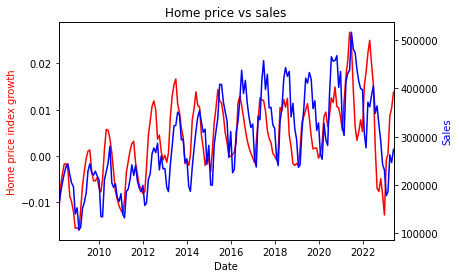

In [61]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date') 
ax1.set_ylabel('Home price index growth', color = 'red') 
ax1.plot(target_growth['date'], target_growth['United States'], 'r-') 
  
plt.title('Home price vs sales')
ax1.set_xlim([max(target_growth['date'].min(), sales['date'].min()), \
          min(target_growth['date'].max(), sales['date'].max())])

ax2 = ax1.twinx() 
ax2.set_ylabel('Sales', color = 'blue') 
ax2.plot(sales['date'], sales['United States'], 'b-') 

plt.show()

## Home inventory

In [62]:
inventory = pd.read_csv('inventory.csv')
inventory = inventory.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
inventory = inventory.rename(columns={'RegionName':'index'})
inventory = inventory.set_index('index')
inventory = inventory.stack().unstack(level=0)
inventory = inventory.reset_index()
inventory = inventory.rename(columns={'index': 'date'})
inventory['date'] = pd.to_datetime(inventory['date'])
inventory = inventory.sort_values(['date'])

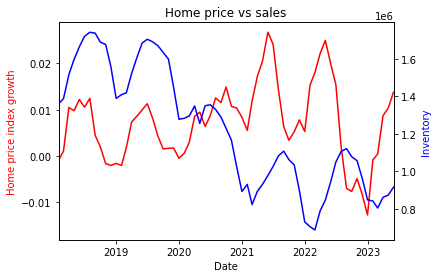

In [63]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date') 
ax1.set_ylabel('Home price index growth', color = 'red') 
ax1.plot(target_growth['date'], target_growth['United States'], 'r-') 
  
plt.title('Home price vs sales')
ax1.set_xlim([max(target_growth['date'].min(), inventory['date'].min()), \
          min(target_growth['date'].max(), inventory['date'].max())])

ax2 = ax1.twinx() 
ax2.set_ylabel('Inventory', color = 'blue') 
ax2.plot(inventory['date'], inventory['United States'], 'b-') 

plt.show()

## New listings

In [64]:
new_listings = pd.read_csv('new_listings.csv')
new_listings = new_listings.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
new_listings = new_listings.rename(columns={'RegionName':'index'})
new_listings = new_listings.set_index('index')
new_listings = new_listings.stack().unstack(level=0)
new_listings = new_listings.reset_index()
new_listings = new_listings.rename(columns={'index': 'date'})
new_listings['date'] = pd.to_datetime(new_listings['date'])
new_listings = new_listings.sort_values(['date'])

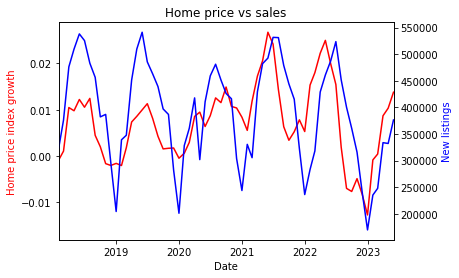

In [65]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Date') 
ax1.set_ylabel('Home price index growth', color = 'red') 
ax1.plot(target_growth['date'], target_growth['United States'], 'r-') 
  
plt.title('Home price vs sales')
ax1.set_xlim([max(target_growth['date'].min(), new_listings['date'].min()), \
          min(target_growth['date'].max(), new_listings['date'].max())])

ax2 = ax1.twinx() 
ax2.set_ylabel('New listings', color = 'blue') 
ax2.plot(new_listings['date'], new_listings['United States'], 'b-') 

plt.show()